# Implementing basic ML Algorithms from scratch


----


### Objectives:

- Implement some basic ML Algorithms from scratch not using libraries exept for Numpy:
   - Part 1: Linear Regression
      - Simple LR
      - Multiple LR
      - Polynomial LR
   - Part 2: Logistic Regression
   - Part 3: Neural Network
  




### Context:

This notebook documents my first steps in Machine Learning, guided by my mentor Artem Yankov and the Machine Learning course by Andrew Ng on Coursera. 




-----


### Libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt


# Part 3: Neural Networks

This work aims to create Neural Networks from scratch using only the NumPy library, without relying on any other machine learning specialized libraries.

This Notebook is structured as follows:

    3.1 Regression
        Solve a simple Linear Regression problem using a Neural Network with 3 layers.
        3.1.1 Create the Neural Network from scratch, including parameter fitting.
        3.1.2 Create a Neural Network with the same architecture using TensorFlow.
        3.1.3 Compare results using the Training and Test Set.

    3.2 Classification
        Solve the Coursera ML Specialization Lab titled 'Coffee Roasting' using a Neural Network.
        3.2.1 Create the Neural Network from scratch, including parameter fitting.
        

References:
- Coursera ML Specialization by Andrew Ng
- Neural Networks Demystified by Stephen C Welch
   


## 3.1 Regression


### 3.1.1 Create the Neural Network from scratch, including parameter fitting.


### 3.1.1.1 Model
   <center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  


#### Neural network with the following structure:
    Input Layer: 2 features
    Hidden Layer: 3 neurons (Sigmoid activation)
    Output Layer: 1 neuron (Sigmoid activation)

#### Following an OOP approach. First, We will define a Neural Network Class and then the attributes and methods to do the job.

In [15]:
class Neural_Network_3L:
#3L: three layers: input[0], hidden[1] and output[2] layers
    def __init__(self):
        self.inputLayerSize = 2
        self.hiddenLayerSize = 3
        self.outputLayerSize = 1
        self.initParams()

    def initParams(self):
       # Initialize the parameters matrices using smaller random values
        self.W1 = np.random.randn(self.inputLayerSize, self.hiddenLayerSize) * 0.01
        #self.B1 = np.random.randn(1, self.hiddenLayerSize) #* 0.01
        self.B1 = np.zeros((1, self.hiddenLayerSize))
        self.W2 = np.random.randn(self.hiddenLayerSize, self.outputLayerSize) * 0.01
        #self.B2 = np.random.randn(1, self.outputLayerSize) #* 0.01
        self.B2 = np.zeros((1, self.outputLayerSize))
        

    def sigmoid(self,z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))
        

#### Forward Prop equations:

   <center> <img  src="./images/I_1.jpg" width="600" />   <center/>  


In [18]:
def forwardProp(self,X):
    # Propagate X through the network
    self.Z1 = np.matmul(X, self.W1) + self.B1          # equation (1) 
    self.A1 = self.sigmoid(self.Z1)                    # equation (2) 
    self.Z2 = np.matmul(self.A1, self.W2) + self.B2    # equation (3) 
    self.A2 = self.sigmoid(self.Z2)                    # equation (4) 
    return self.A2

def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    m = X.shape[0]
    self.yHat = self.forwardProp(X)
    error = (self.yHat-y)**2
    J = np.sum(error)/(2*m)
    return J
        
# adding the methods to the class
Neural_Network_3L.forwardProp = forwardProp
Neural_Network_3L.costFunction = costFunction
        

#### Calculate the derivatives using Backward Propagation and the Chain Rule for Derivation.

<center> <img  src="./images/I_2.jpg" width="600" />   <center/>  

<center> <img  src="./images/I_3.jpg" width="600" />   <center/>  

In [22]:
def costFunctionPrime(self, X, y):

    self.yHat = self.forwardProp(X)
    m = X.shape[0]
    
    # dJdW2 and dJdB2 - from equation (6)
    delta2 = np.multiply((self.yHat - y), self.sigmoidPrime(self.Z2))
    dJdW2 = np.matmul(self.A1.T, delta2)
    dJdB2 = delta2

    # dJdW1 and dJdB1 - from equation (7)
    delta1 = np.matmul(delta2, self.W2.T) * self.sigmoidPrime(self.Z1)
    dJdW1 = np.matmul(X.T, delta1)
    dJdB1 = delta1
    
    dJdW2 = dJdW2 / m
    dJdW1 = dJdW1 / m
    dJdB2 = np.sum(dJdB2, axis=0, keepdims=True) / m
    dJdB1 = np.sum(dJdB1, axis=0, keepdims=True) / m
    
    return dJdW1, dJdW2, dJdB1, dJdB2
    
def sigmoidPrime(self,z):
    # Sigmoid activation function derivative
    sig = self.sigmoid(z)
    return sig*(1-sig)

# adding the methods to the class
Neural_Network_3L.costFunctionPrime = costFunctionPrime
Neural_Network_3L.sigmoidPrime = sigmoidPrime



### 3.1.1.2 UNIT TEST: Numerical Gradient Checking

To test the computation of the Cost Derivatives (dJdW1, dJdW2, dJdB1, dJdB2) included in the method 'costFunctionPrime', we will use a numerical approach using the derivatives definition, adding a "Minuscule" epsilon to the current value and computing the cost function, subtracting epsilon from the current value and computing the cost function, and then computing the slope between these two values. 

The idea is to ensure that the gradients computed through backpropagation (analytical gradients) are correct by comparing them with gradients computed using a numerical approach.

Following, we used as a reference and modified the code from 'Part 5: Numerical Gradient Checking' of 'Neural Networks Demystified' by **@stephencwelch**.

In [25]:
#Helper Functions for interacting with other classes:
def getParams(self):
    #Get W1,W2,B2 and B1 unrolled into vector:
    params = np.concatenate((self.W1.ravel(), self.W2.ravel(), self.B1.ravel(), self.B2.ravel()))
    return params

def setParams(self, params):
    #Set W1 and W2 using single paramater vector.
    W1_start = 0
    W1_end = self.hiddenLayerSize * self.inputLayerSize
    self.W1 = np.reshape(params[W1_start:W1_end], (self.inputLayerSize , self.hiddenLayerSize))
    W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
    self.W2 = np.reshape(params[W1_end:W2_end], (self.hiddenLayerSize, self.outputLayerSize))
    B1_end = W2_end + self.hiddenLayerSize
    self.B1 = np.reshape(params[W2_end:B1_end], (1, self.hiddenLayerSize))
    B2_end = B1_end + self.outputLayerSize
    self.B2 = np.reshape(params[B1_end:B2_end], (1, self.outputLayerSize))

def numgrad2Devs(self,numgrad):
    # converts the numerical gradient array to param matrix derivatives
    dJdW1_start = 0
    dJdW1_end = self.hiddenLayerSize * self.inputLayerSize
    dJdW1 = np.reshape(numgrad[dJdW1_start:dJdW1_end], (self.inputLayerSize , self.hiddenLayerSize))
    dJdW2_end = dJdW1_end + self.hiddenLayerSize*self.outputLayerSize
    dJdW2 = np.reshape(numgrad[dJdW1_end:dJdW2_end], (self.hiddenLayerSize, self.outputLayerSize))
    dJdB1_end = dJdW2_end + self.hiddenLayerSize
    dJdB1 = np.reshape(numgrad[dJdW2_end:dJdB1_end], (1, self.hiddenLayerSize))
    dJdB2_end = dJdB1_end + self.outputLayerSize
    dJdB2 = np.reshape(numgrad[dJdB1_end:dJdB2_end], (1, self.outputLayerSize))

    return dJdW1, dJdW2, dJdB1, dJdB2

 
def computeNumericalGradient(self, X, y):
        paramsInitial = self.getParams()
        numgrad = np.zeros(paramsInitial.shape)
        perturb = np.zeros(paramsInitial.shape)
        e = 1e-4

        for p in range(len(paramsInitial)):
            #Set perturbation vector
            perturb[p] = e
            self.setParams(paramsInitial + perturb)
            loss2 = self.costFunction(X, y)
            
            self.setParams(paramsInitial - perturb)
            loss1 = self.costFunction(X, y)

            # added code to avoid errors: ensure loss1 and loss2 are scalars
            loss2 = loss2.item() if np.ndim(loss2) > 0 else loss2
            loss1 = loss1.item() if np.ndim(loss1) > 0 else loss1

            #Compute Numerical Gradient
            numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
            perturb[p] = 0
            
        #Return Params to original value:
        self.setParams(paramsInitial)

        return numgrad 
       
def computeGradients(self, X, y):
    dJdW1, dJdW2, dJdB1, dJdB2 = self.costFunctionPrime(X, y)
    return np.concatenate((dJdW1.ravel(), dJdW2.ravel(), dJdB1.ravel(), dJdB2.ravel()))

# adding the methods to the class
Neural_Network_3L.getParams = getParams
Neural_Network_3L.setParams = setParams
Neural_Network_3L.computeGradients = computeGradients
Neural_Network_3L.computeNumericalGradient = computeNumericalGradient
Neural_Network_3L.numgrad2Devs = numgrad2Devs


#### Calculate the Error between gradients: 
Compare Analytically Computed vs. Numerically approximated Gradients

In [27]:
# Data test set
X = np.array(([3,5], [5,1], [10,2]), dtype=float)
y = np.array(([75], [82], [93]), dtype=float)

# Normalize
X = X/np.amax(X, axis=0)
y = y/100 #Max test score is 100

In [28]:
NN = Neural_Network_3L()

In [29]:
numgrad = NN.computeNumericalGradient(X,y)
numgrad

array([ 6.67769562e-06, -9.87086329e-05, -1.35399309e-04,  4.87427588e-06,
       -7.20528445e-05, -9.88330804e-05, -4.13113392e-02, -4.11579963e-02,
       -4.11673904e-02,  1.00354993e-05, -1.48345477e-04, -2.03484448e-04,
       -8.28190999e-02])

In [30]:
grad = NN.computeGradients(X,y)
grad

array([ 6.67769558e-06, -9.87086330e-05, -1.35399309e-04,  4.87427596e-06,
       -7.20528446e-05, -9.88330804e-05, -4.13113392e-02, -4.11579964e-02,
       -4.11673904e-02,  1.00354993e-05, -1.48345477e-04, -2.03484448e-04,
       -8.28191000e-02])

If we computed our gradient correctly, the ratio of the Euclidean norm of the difference by the Euclidean norm of the sum of the vectors should be on the order of 10^-8 or less.


In [32]:
from numpy.linalg import norm
norm(grad-numgrad)/norm(grad+numgrad)

3.1724041521889497e-10

Test result: <span style="color: green;"> OK</span>

### 3.1.1.3 Train the Neural Network

Implementing Gradient Descent

In [36]:
import time

In [37]:
def train_gradientDescent(self, X, y, alpha, epochs, init=True, verbose=True, debug=True, numerical=False, logtime=False):
        
    # Initialize the parameters
    if init:
        self.initParams()

    J_hist = []
    param_hist = []
    
    # Record start time
    start_time = time.time()  
    
    # Gradient Descent iterations
    for i in range(epochs):

        # Calculate the Cost and log it
        cost = self.costFunction(X, y)
        J_hist.append(cost.item())

        # Calculates the derivatives
        if numerical:
            numgrad = self.computeNumericalGradient(X, y)
            dJdW1, dJdW2, dJdB1, dJdB2 = self.numgrad2Devs(numgrad)            
        else:
            dJdW1, dJdW2, dJdB1, dJdB2 = self.costFunctionPrime(X, y)

        if verbose:
            # Print intermediate values
            if i % int(epochs/10) == 0:
                # Print the result
                print(f'Epoch {i}: Cost = {cost}')
        
        # Update parameters
        self.W1 = self.W1 - alpha*dJdW1
        self.W2 = self.W2 - alpha*dJdW2
        self.B1 = self.B1 - alpha*dJdB1
        self.B2 = self.B2 - alpha*dJdB2
    
        if debug:
            params = self.getParams()
            param_hist.append(params)

    if logtime:
        # Record end time
        end_time = time.time()  # Record end time
        elapsed_time = end_time - start_time  # Calculate elapsed time
        print(f'Elapsed time: {elapsed_time:2.1f} s')
        
    return J_hist, np.array(param_hist)

# adding the methods to the class
Neural_Network_3L.train_gradientDescent = train_gradientDescent


In [38]:
NN = Neural_Network_3L()

In [39]:
J_hist, param_hist = NN.train_gradientDescent(X,y,3, 10000)

Epoch 0: Cost = 0.05812994251316942
Epoch 1000: Cost = 0.000613061471456875
Epoch 2000: Cost = 0.0002900980501558202
Epoch 3000: Cost = 0.0001415891511386369
Epoch 4000: Cost = 5.849569131044012e-05
Epoch 5000: Cost = 2.1376203120240066e-05
Epoch 6000: Cost = 7.32116210780421e-06
Epoch 7000: Cost = 2.4351954704635094e-06
Epoch 8000: Cost = 7.997628329826333e-07
Epoch 9000: Cost = 2.6116026455675555e-07


In [40]:
def plotParams(param_hist):
    labels = ['W1_11', 'W1_12', 'W1_13', 'W1_21', 'W1_22', 'W1_23', 'W2_11', 'W2_12', 'W2_13', 'B1_11', 'B1_12', 'B1_13', 'B2_11']
    steps_range = np.arange(param_hist.shape[0])
    #steps_range = np.arange(20)
    plt.figure(figsize=(10, 8))
    for i in range(param_hist.shape[1]):
    #for i in range(20):
        plt.plot(steps_range, param_hist[:, i], label=f'Column {labels[i]}')
        mid_point = len(steps_range) // 2
        plt.text(steps_range[mid_point], param_hist[mid_point,i], f'{labels[i]}', fontsize=8, color='blue')
        
    # Add labels and title
    plt.xlabel('epochs')
    plt.ylabel('Param. Value')
    plt.title('Parameters change during Gradient Descent computing')
    #plt.legend(loc='upper right')
    
    # Show plot
    plt.show()

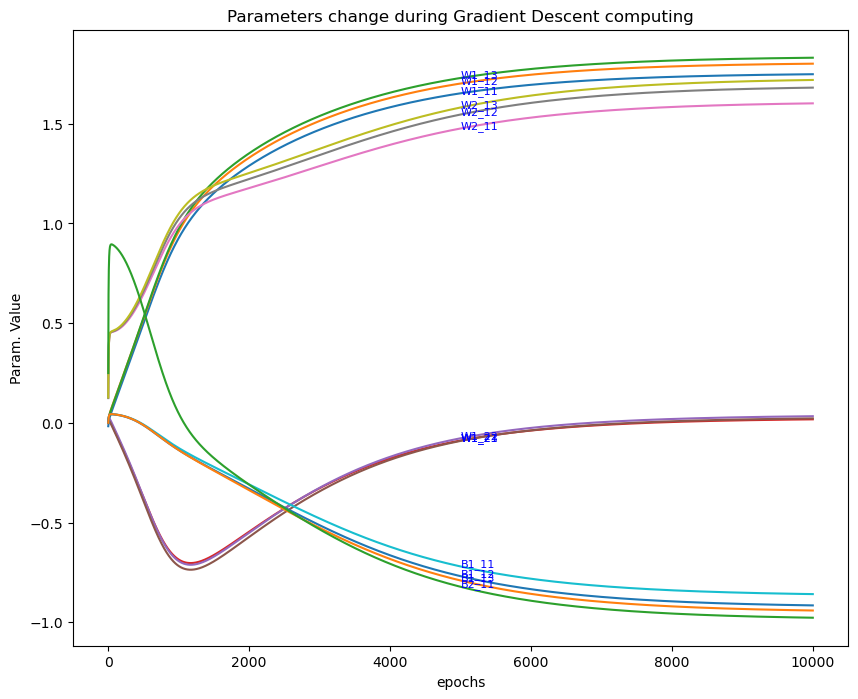

In [41]:
plotParams(param_hist)

In [42]:
def plotJhist(J_hist):
    steps_range = np.arange(len(J_hist))
    #steps_range = np.arange(20)
    plt.figure(figsize=(6, 3))
    plt.plot(steps_range, J_hist[:]) 
    plt.grid(True)
    # Add labels and title
    plt.xlabel('epochs')
    plt.ylabel('Cost J')
    plt.title('Cost (J) change during Gradient Descent')
    plt.show()

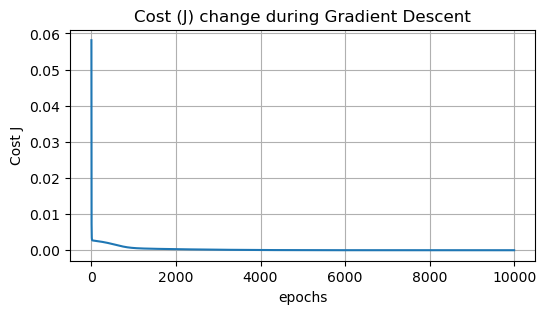

In [43]:
plotJhist(J_hist)

In [44]:
yHat = NN.forwardProp(X)
yHat

array([[0.74996704],
       [0.82035585],
       [0.92938147]])

In [45]:
y

array([[0.75],
       [0.82],
       [0.93]])

Converging results: The predicted values are very close to the target values. Additionally, the cost J decreased considerably.

-----

### 3.1.2 Create a Neural Network with the same architecture but using TensorFlow.


In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tf.random.set_seed(23)

First, let's try using the same architecture with 'sigmoid' activation functions.

In [51]:
model1 = Sequential(
    [               
        tf.keras.Input(shape=(2,)),    #specify input size
        tf.keras.layers.Dense(units=3, activation='sigmoid'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)                            

In [52]:
model1.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [53]:
[layer1, layer2] = model1.layers

In [54]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")

W1 shape = (2, 3), b1 shape = (3,)
W2 shape = (3, 1), b2 shape = (1,)


In [55]:
model1.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.2),
)
# Train the model
history = model1.fit(
    X, y,
    epochs=100
    )

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - loss: 0.1190
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0306
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0070
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0057
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0088
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0119
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0144
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0162
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0175
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0184
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0190
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0193
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0195
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0194
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0192
Epoch 16/100
1/1 ━

In [56]:
def plotTF_Jhist(history):
    loss_values = history.history['loss']
    # Plot the loss values
    plt.figure(figsize=(6, 3))
    plt.plot(loss_values, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()


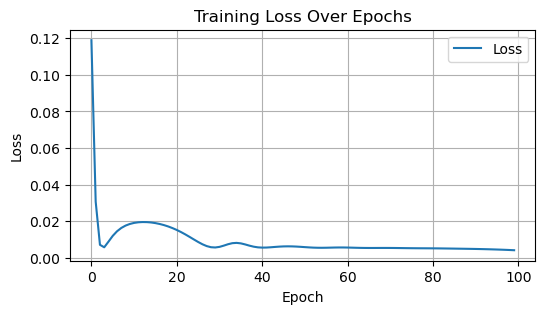

In [57]:
plotTF_Jhist(history)

In [58]:
prediction = model1.predict(X)
print(f" {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
 [[0.8157331]
 [0.8246623]
 [0.8435374]]


In [59]:
y

array([[0.75],
       [0.82],
       [0.93]])

#### The model built with TensorFlow also converges using the same neural network architecture.

## 3.1.3 Compare results using: a larger Training Set, a Cross-Validation (DevSet) and Test Sets.

### Data set:

#### We use the same type of data generation used for Linear Regression (Part 1).

In [64]:
def genDataSet(size, x1_min, x1_max, x2_min, x2_max, seed):
    ## input features (x_j)
    m = size
    
    # Define the limits and list of choice for each feature
    x1_lims = [x1_min, x1_max]
    x2_lims = [x2_min, x2_max]
       
    #x1_lims = [200, 2000]
    #x2_lims = [20, 100]
    
    # Initialize each feature using ramdom values
    np.random.seed(seed)  # Seed the random numbers for reproducibility
    x1 = np.random.randint(x1_lims[0], x1_lims[1], size=m)
    x2 = np.random.randint(x2_lims[0], x2_lims[1], size=m)
    
    # Coefs to construct the output with noise 
    a = 3      #quadratic
    b1 = 0.0003 #linear
    b2 = -3 #linear
    c = 2000    #intercept
    
    # White noise
    noise1 = np.random.uniform(0.5, 1.5, size=m)
    noise2 = np.random.uniform(-1, 1, size=m)
    
    # The output is a polynomial function of the features values with added noise
    y = (a*2*noise1*x1 + b1*(x1**2) + (.5*a*noise1*x2 + b2*b1*2*(x2**2)) + c*(1 + .5*noise2)) 
    y = np.array(y).reshape(len(y),1)
    
    # Convert the 2 features vector in a matrix X (2-D)
    X = np.c_[x1, x2]
    
    print(f'x_1\n\t\tmin: {x1.min()}\t max: {x1.max()} \tcorrelation with "y": {np.corrcoef(x1,y.ravel())[0,1]:3.3f}')
    print(80*"-")
    print(f'x_2\n\t\tmin: {x2.min()}\t\t max: {x2.max()} \tcorrelation with "y": {np.corrcoef(x2,y.ravel())[0,1]:3.3f}')

    return X, y


In [65]:
# Generate the Data Set.
# Where: 
# m = 200
# x1_min = 200
# x1_max = 2000
# x2_min = 20
# x2_max = 100
# random seed = 23
X_train, y_train = genDataSet(200, 200, 2000, 20, 100, 23)

x_1
		min: 204	 max: 1996 	correlation with "y": 0.843
--------------------------------------------------------------------------------
x_2
		min: 20		 max: 99 	correlation with "y": -0.231


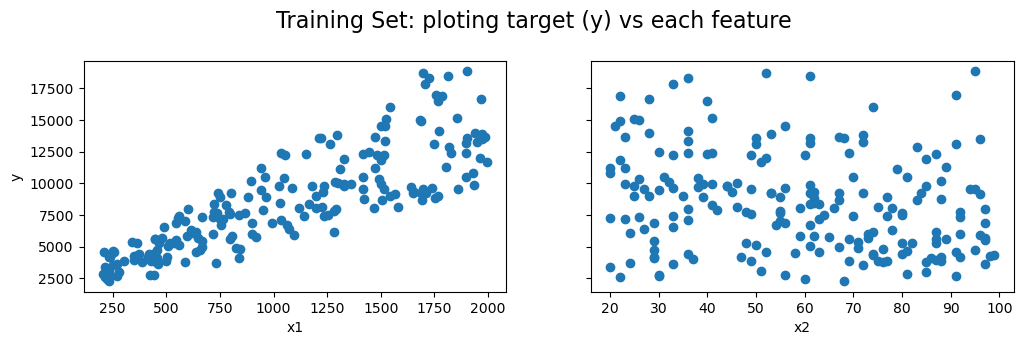

In [66]:
X_features = ['x1','x2']
fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
fig.suptitle("Training Set: ploting target (y) vs each feature", fontsize=16, y=1.05)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("y")
plt.show()

### Scaling:

#### Apply Z-score normalization:

In [69]:
x1_mean = X_train[:,0].mean()
x1_std = X_train[:,0].std()
x2_mean = X_train[:,1].mean()
x2_std = X_train[:,1].std()
y_max = y_train.max()

def scale_zscore(X, x1_mean, x2_mean, x1_std, x2_std, y, y_max):
    X1n = (X[:,0] - x1_mean) / x1_std
    X2n = (X[:,1] - x2_mean) / x2_std
    Xn = np.stack((X1n, X2n), axis=1)
    yn = y/y_max
    
    return Xn, yn

X_train_n, y_train_n = scale_zscore(X_train, x1_mean, x2_mean, x1_std, x2_std, y_train, y_max)


In [70]:
print(f"x1 pre normalization (min/max): {np.min(X_train[:,0]):0.2f} / {np.max(X_train[:,0]):0.2f}")
print(f"x2 pre normalization (min/max): {np.min(X_train[:,1]):0.2f} / {np.max(X_train[:,1]):0.2f}")
print(f"y pre normalization (min/max): {np.min(y_train[:]):0.2f} / {np.max(y_train[:]):0.2f}")
print(60*"-")
print(f"x1 post normalization (min/max): {np.min(X_train_n[:,0]):0.2f}, {np.max(X_train_n[:,0]):0.2f}")
print(f"x2 post normalization (min/max): {np.min(X_train_n[:,1]):0.2f}, {np.max(X_train_n[:,1]):0.2f}")
print(f"y post normalization (min/max): {np.min(y_train_n[:]):0.2f}, {np.max(y_train_n[:]):0.2f}")

x1 pre normalization (min/max): 204.00 / 1996.00
x2 pre normalization (min/max): 20.00 / 99.00
y pre normalization (min/max): 2280.73 / 18831.50
------------------------------------------------------------
x1 post normalization (min/max): -1.55, 1.75
x2 post normalization (min/max): -1.65, 1.73
y post normalization (min/max): 0.12, 1.00


In [71]:
X_train_n.shape, y_train_n.shape

((200, 2), (200, 1))

In [72]:
J_hist_2, param_hist_2 = NN.train_gradientDescent(X_train_n,y_train_n, 4, 2000)

Epoch 0: Cost = 0.022160404539426696
Epoch 200: Cost = 0.006135782259322617
Epoch 400: Cost = 0.006090111295160168
Epoch 600: Cost = 0.006077267750986691
Epoch 800: Cost = 0.006067187728934869
Epoch 1000: Cost = 0.006058947763196713
Epoch 1200: Cost = 0.0060519471746352214
Epoch 1400: Cost = 0.006045780129187759
Epoch 1600: Cost = 0.006040163835424983
Epoch 1800: Cost = 0.0060348982810877125


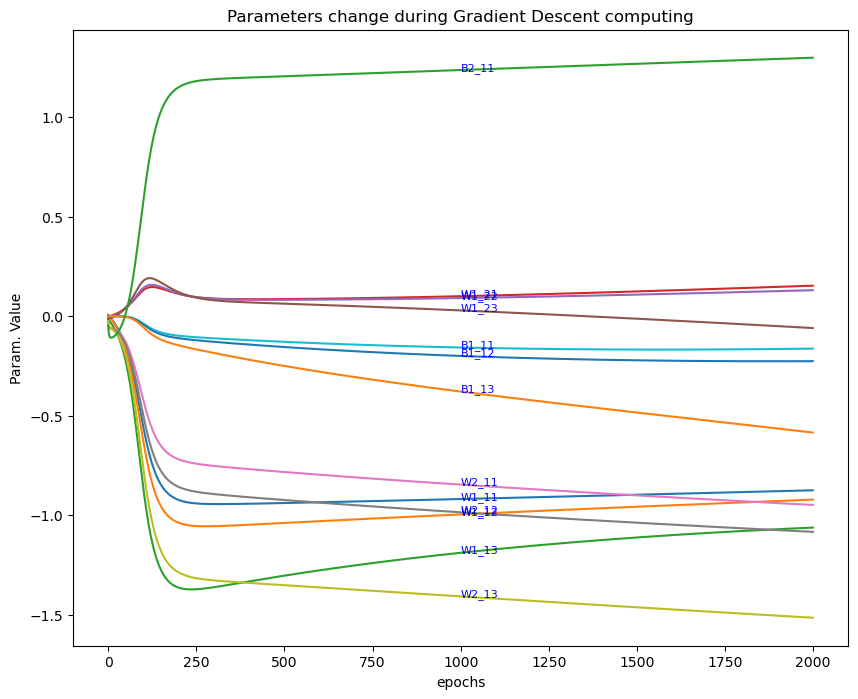

In [73]:
plotParams(param_hist_2)

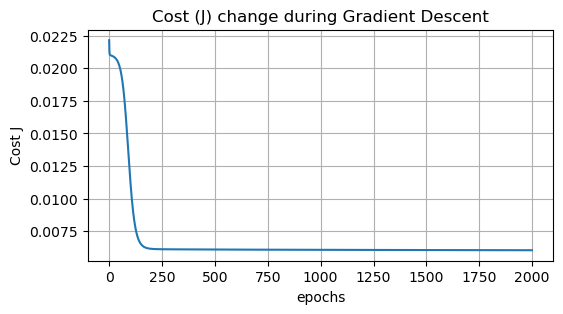

In [74]:
plotJhist(J_hist_2)

### Using TensorFlow model:

In [76]:
model1 = Sequential(
    [               
        tf.keras.Input(shape=(2,)),    #specify input size
        tf.keras.layers.Dense(units=3, activation='sigmoid'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ], name = "my_model" 
)    
model1.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.009),
)
history_2 = model1.fit(
    X_train_n, y_train_n,
    epochs=100
    )

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - loss: 0.0803
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0665
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0553
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0473 
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0424
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0397
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 998us/step - loss: 0.0384
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0375
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0365
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0352
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0339
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0325 
Epoch 13/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.0312
Epoch 14/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0299
Epoch 15/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 0.0287
Epoch 

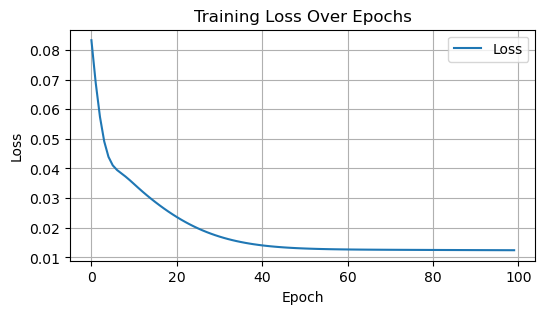

In [77]:
plotTF_Jhist(history_2)

### Calculate and Plot the predictions:

In [79]:
predict_NNscratch_train = NN.forwardProp(X_train_n)
predict_TF_train = model1.predict(X_train_n)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


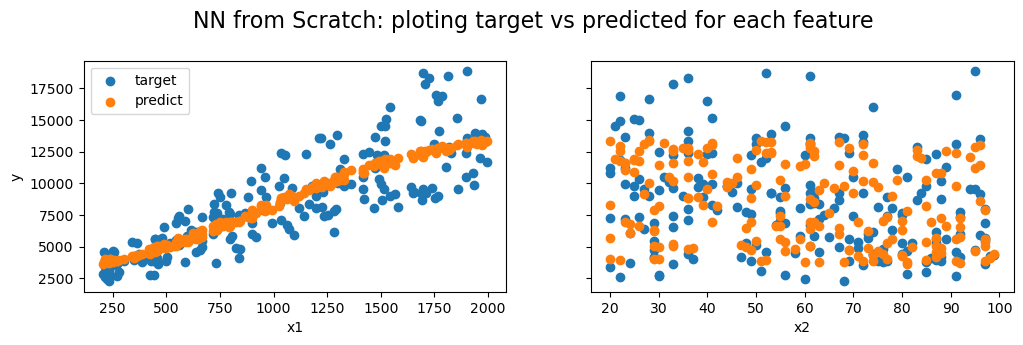

In [80]:
def plotTargetVSPredict(X,y,predict,title):
    X_features = ['x1','x2']
    fig,ax=plt.subplots(1, 2, figsize=(12, 3), sharey=True)
    fig.suptitle(title, fontsize=16, y=1.05)
    for i in range(len(ax)):
        ax[i].scatter(X[:,i],y, label = 'target')
        ax[i].scatter(X[:,i],predict, label = 'predict')
        ax[i].set_xlabel(X_features[i])
    ax[0].set_ylabel("y")
    ax[0].legend()
    plt.show()

plotTargetVSPredict(X_train,y_train,predict_NNscratch_train*y_max,"NN from Scratch: ploting target vs predicted for each feature")

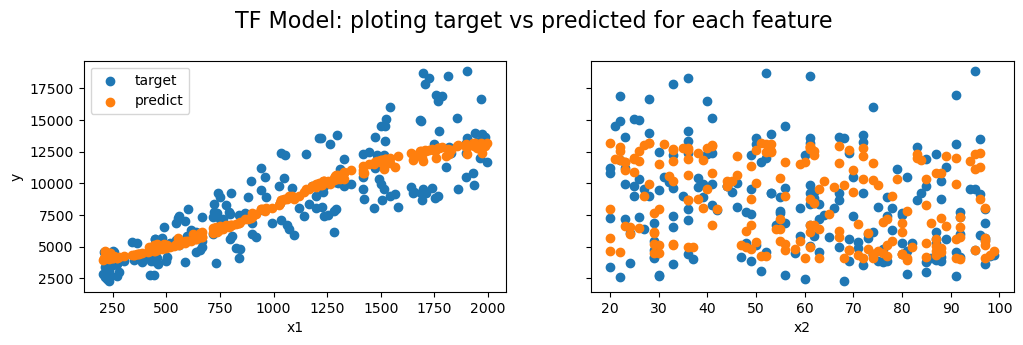

In [81]:
plotTargetVSPredict(X_train,y_train,predict_TF_train*y_max,"TF Model: ploting target vs predicted for each feature")

## Compare Mean Squared Error (MSE) between both models

### Using the Training Set:

In [84]:
def meanSquaredError(yhat,y):
    """ calculate the Mean Square Error between the predicted(yhat) and the target(y) """
    error = (yhat - y)**2
    mre = np.sum(error)/y.shape[0]
    return mre


In [85]:
# calculate the predicted y from both models: "from Scratch" vs TensorFlow
MSE_NNscratch_train = meanSquaredError(predict_NNscratch_train, y_train_n)
MSE_TF_train = meanSquaredError(predict_TF_train, y_train_n)

print(" Calculate the MSE between both models:")
print(f' NN "from scratch":\t {MSE_NNscratch_train:2.8f}')
print(f' Using TF:\t\t {MSE_TF_train:2.8f}')

 Calculate the MSE between both models:
 NN "from scratch":	 0.01205969
 Using TF:		 0.01242177


----

Double-check with SciKit-learn MSE calculation:

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
print(" Calculate the MSE between both models using SciKit Learn 'mean_squared_error()':")
print(f' NN "from scratch":\t {mean_squared_error(y_train_n, predict_NNscratch_train):2.8f}')
print(f' Using TF:\t\t {mean_squared_error(y_train_n, predict_TF_train):2.8f}')



 Calculate the MSE between both models using SciKit Learn 'mean_squared_error()':
 NN "from scratch":	 0.01205969
 Using TF:		 0.01242177


----

### Using the Dev Test (CV):

In [92]:
# random seed = 24 -> IMPORTANT, we change the seed to don't repeat values of the training set.
X_cv, y_cv = genDataSet(60, 200, 2000, 20, 100, 24)

x_1
		min: 204	 max: 1959 	correlation with "y": 0.827
--------------------------------------------------------------------------------
x_2
		min: 20		 max: 96 	correlation with "y": -0.074


In [93]:
# Scale: use the same scaling for the Training Set 
# Where x1_mean, x2_mean, x1_std, x2_std and y_max are from the Training Set and used as parameters for the scaling function:
X_cv_n, y_cv_n = scale_zscore(X_cv, x1_mean, x2_mean, x1_std, x2_std, y_cv, y_max)

In [94]:
# Calculate the predicts
predict_NNscratch_cv = NN.forwardProp(X_cv_n)
predict_TF_cv = model1.predict(X_cv_n)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [95]:
# calculate the predicted y from both models: "from Scratch" vs TensorFlow
MSE_NNscratch_cv = meanSquaredError(predict_NNscratch_cv, y_cv_n)
MSE_TF_cv = meanSquaredError(predict_TF_cv, y_cv_n)

print(" Calculate the MSE between both models:")
print(f' NN "from scratch":\t {MSE_NNscratch_cv:2.8f}')
print(f' Using TF:\t\t {MSE_TF_cv:2.8f}')

 Calculate the MSE between both models:
 NN "from scratch":	 0.01111335
 Using TF:		 0.01114225


### Using the Test Set:

In [97]:
# random seed = 25 -> IMPORTANT, we change the seed to don't repeat values
X_test, y_test = genDataSet(60, 200, 2000, 20, 100, 25)

x_1
		min: 309	 max: 1995 	correlation with "y": 0.827
--------------------------------------------------------------------------------
x_2
		min: 22		 max: 99 	correlation with "y": -0.079


In [98]:
# Scale: use the same scaling for the Training Set 
# Where x1_mean, x2_mean, x1_std, x2_std and y_max are from the Training Set and used as parameters for the scaling function:
X_test_n, y_test_n = scale_zscore(X_test, x1_mean, x2_mean, x1_std, x2_std, y_test, y_max)

In [99]:
# Train both models with the Test Set:
J_hist_test, param_hist_test = NN.train_gradientDescent(X_test_n, y_test_n, 5, 2000, verbose=False)
history_test = model1.fit(X_test_n, y_test_n, epochs=100, verbose=False)

# Calculate the predicts
predict_NNscratch_test = NN.forwardProp(X_test_n)
predict_TF_test = model1.predict(X_test_n)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step


In [100]:
print("Calculate the MSE between both models:")
MSE_NNscratch_test = meanSquaredError(predict_NNscratch_test, y_test_n)
MSE_TF_test = meanSquaredError(predict_TF_test, y_test_n)

print(f' NN "from scratch":\t {MSE_NNscratch_test:2.8f}')
print(f' Using TF:\t\t {MSE_TF_test:2.8f}')

Calculate the MSE between both models:
 NN "from scratch":	 0.01139147
 Using TF:		 0.01166799


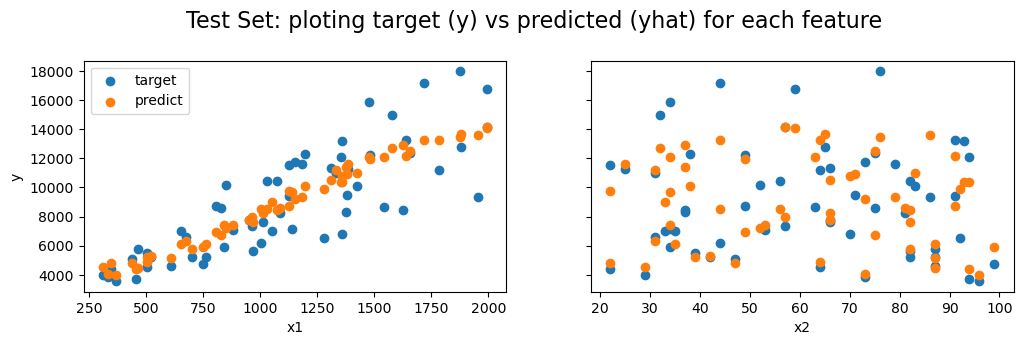

In [101]:
plotTargetVSPredict(X_test,y_test,predict_NNscratch_test*y_max,"Test Set: ploting target (y) vs predicted (yhat) for each feature")

----

### Let's add poly features and see the impact on MSE using the Train and Dev sets:


In [104]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [105]:
degree = 4
   
# Add polynomial features to the training set
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(X_train)

# Scale the training set
scaler_poly = StandardScaler()
X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

# Chage the TF model with an Input Layer to accept the poly features
model2b = Sequential(
    [               
        tf.keras.Input(shape=(14,)),    # change 2 to 27 because of the new mapped features, degree 6
        tf.keras.layers.Dense(units=3, activation='relu', use_bias=True),
        tf.keras.layers.Dense(units=1, activation='linear', use_bias=True)
    ])    
model2b.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
)
history_m2b = model2b.fit(X_train_mapped_scaled, y_train, epochs=200, verbose=False)
predict_TF_m2b = model2b.predict(X_train_mapped_scaled)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


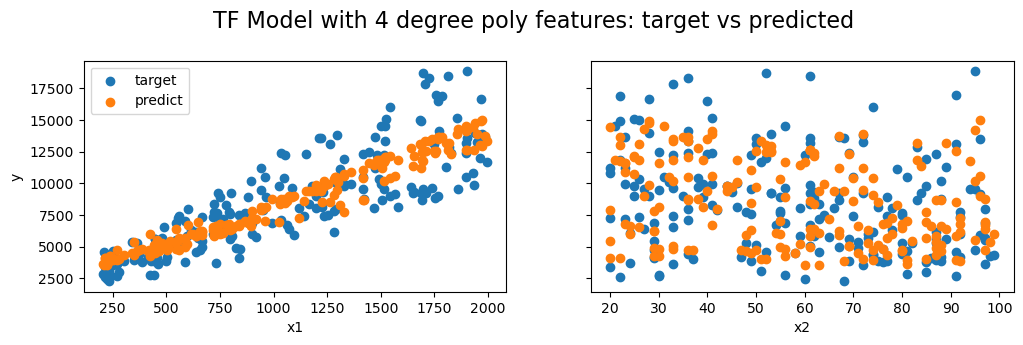

In [106]:
plotTargetVSPredict(X_train,y_train,predict_TF_m2b,"TF Model with " + str(degree) + " degree poly features: target vs predicted")

In [107]:
print("Calculate the MSE for the Training Set:")
MSE_TF_train_poly = meanSquaredError(predict_TF_m2b/y_max, y_train_n)
print(f' TF model2 :\t {MSE_TF_train_poly:2.8f}')


Calculate the MSE for the Training Set:
 TF model2 :	 0.01279781


In [108]:
X_cv_mapped = poly.fit_transform(X_cv)
X_cv_mapped_scaled = scaler_poly.fit_transform(X_cv_mapped)

predict_TF_m2b_cv = model2b.predict(X_cv_mapped_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


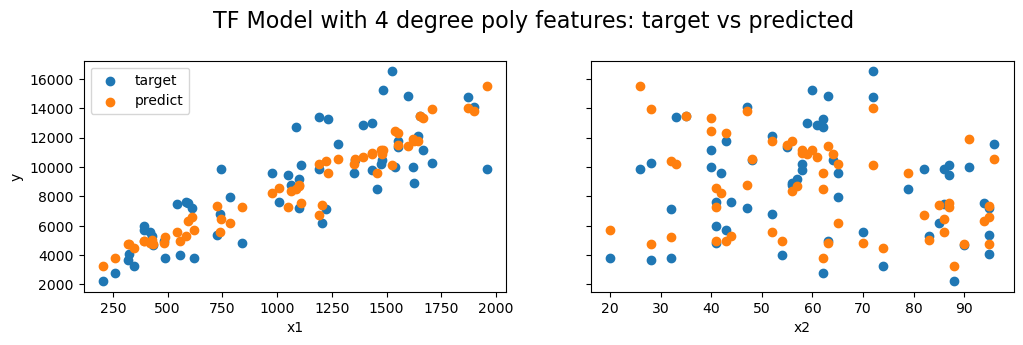

In [109]:
plotTargetVSPredict(X_cv,y_cv,predict_TF_m2b_cv,"TF Model with " + str(degree) + " degree poly features: target vs predicted")

In [110]:
print("Calculate the MSE for Test Set:")
MSE_TF_cv_poly = meanSquaredError(predict_TF_m2b_cv/y_max, y_cv_n)
print(f' TF model2 :\t {MSE_TF_cv_poly:2.8f}')


Calculate the MSE for Test Set:
 TF model2 :	 0.01337381


In [111]:
X_test_mapped = poly.fit_transform(X_test)
X_test_mapped_scaled = scaler_poly.fit_transform(X_test_mapped)
predict_TF_m2b_test = model2b.predict(X_test_mapped_scaled)
MSE_TF_test_poly = meanSquaredError(predict_TF_m2b_test/y_max, y_test_n)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [112]:
print('\n')
print("===  MSE Summary  ========================================================")
print("\t\t\t\tTrain:\t\tCV:\t\tTest:") 
print(f"NN from scratch: \t\t{MSE_NNscratch_train:2.5f} \t{MSE_NNscratch_cv:2.5f}\t\t{MSE_NNscratch_test:2.5f}")
print(f"TF equivalent: \t\t\t{MSE_NNscratch_train:2.5f} \t{MSE_TF_cv:2.5f}\t\t{MSE_TF_test:2.5f}")
print(f"TF w/poly features (4deg): \t{MSE_TF_train_poly:2.5f} \t{MSE_TF_cv_poly:2.5f}\t\t{MSE_TF_test_poly:2.5f}")
print('\n')

 



===  MSE Summary  ========================================================
				Train:		CV:		Test:
NN from scratch: 		0.01206 	0.01111		0.01139
TF equivalent: 			0.01206 	0.01114		0.01167
TF w/poly features (4deg): 	0.01280 	0.01337		0.01582




-----

----

## 3.2 Classification


### Solve the Coursera ML Specialization Lab titled 'Coffee Roasting' using a Neural Network from scratch.

    

### 3.2.1 Create the Neural Network from scratch, including parameter fitting.


### 3.2.1.1 Model
   <center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  


### Forward Prop equations:

#### For a classification problem, the forward propagation equations remain unchanged.

   <center> <img  src="./images/I_1.jpg" width="600" />   <center/>  


### Calculate the derivatives using Backward Propagation and the Chain Rule for Derivation.


#### The Cost function has changed. For Logistic Regression, we use the Binary Cross-Entropy equation. The analytical derivatives are calculated as follows:

<center> <img  src="./images/I_2.jpg" width="600" />   <center/>  
<center> <img  src="./images/I_3.jpg" width="600" />   <center/>

### Modeling the LogReg NN

Following an object-oriented programming (OOP) approach, we will create a new class that inherits from the original class and then rewrite the methods to adapt the neural network for logistic regression.

In [127]:
class Neural_Network_3L_LogR(Neural_Network_3L):
    def __init__(self):
        super().__init__()

    # Add a new method to predict the binary output
    def predict(self, X):
        A2 = self.forwardProp(X)
        predictions = (A2 > 0.5).astype(int)       
        return predictions
        
    # Add a new Cost J function using Binary Cross-Entropy
    def costFunction(self, X, y):
        m = X.shape[0]
        self.yHat = self.forwardProp(X)
        cost = -np.sum( y * np.log(self.yHat) + (1 - y) * np.log(1 - self.yHat)) / m
        # Squeeze the cost to remove single-dimensional entries
        cost = np.squeeze(cost)
        return cost

    def costFunctionPrime(self, X, y):
        
        m = X.shape[0]
        
        # initialize self.yHat, self.A1, self.A2, self.Z1 and self.Z2
        self.yHat = self.forwardProp(X)

        # Parameters and intermediates derivatives
        dJdZ2 = self.yHat - y
        dJdW2 = np.matmul(self.A1.T, dJdZ2)                                          # eq (1)
        dJdB2 = dJdZ2                                                                # eq (2)
        dJdZ1 = np.multiply(np.matmul(dJdZ2,self.W2.T), self.sigmoidPrime(self.Z1))  # eq (5)
        dJdW1 = np.matmul(X.T, dJdZ1)                                                # eq (3) 
        dJdB1 = dJdZ1                                                                # eq (4)

        dJdW2 = dJdW2 / m
        dJdB2 = np.sum(dJdB2, axis=0, keepdims=True) / m
        dJdW1 = dJdW1 / m
        dJdB1 = np.sum(dJdB1, axis=0, keepdims=True) / m
        
        return dJdW1, dJdW2, dJdB1, dJdB2


### 3.2.1.2 TEST: Numerical Gradient Checking

#### Calculate the Error between gradients: 
Compare Analytically Computed vs. Numerically approximated Gradients

In [130]:
# Data test set
X_ut1 = np.array(([3,5], [5,1], [10,2]), dtype=float)
y_ut1 = np.array(([1], [0], [1]), dtype=float)

# Normalize
X_ut1_n = X/np.amax(X, axis=0)

In [131]:
NNLogR = Neural_Network_3L_LogR()

In [132]:
numgrad_LogR = NNLogR.computeNumericalGradient(X_ut1,y_ut1)
numgrad_LogR

array([ 3.62696246e-04,  2.50290509e-03,  4.83746321e-03,  2.70626774e-04,
        1.86736822e-03,  3.61531944e-03, -8.44038205e-02, -8.45899866e-02,
       -8.80010419e-02,  4.55336235e-05,  3.14194699e-04,  6.07689049e-04,
       -1.69578589e-01])

In [133]:
grad_LogR = NNLogR.computeGradients(X_ut1,y_ut1)
grad_LogR

array([ 3.62696279e-04,  2.50290533e-03,  4.83746366e-03,  2.70626779e-04,
        1.86736825e-03,  3.61531951e-03, -8.44038205e-02, -8.45899866e-02,
       -8.80010419e-02,  4.55336252e-05,  3.14194700e-04,  6.07689050e-04,
       -1.69578589e-01])

If we computed our gradient correctly, the ratio of the Euclidean norm of the difference by the Euclidean norm of the sum of the vectors should be on the order of 10^-8 or less.


In [135]:
from numpy.linalg import norm
norm(grad_LogR-numgrad_LogR)/norm(grad_LogR+numgrad_LogR)

1.137874881598941e-09

Test result: <span style="color: green;"> OK</span>

### 3.2.1.3 Data set:

#### We use the same data generator used for the Coursera ML Specialization Lab titled 'Coffee Roasting', now using a Neural Network.

In [139]:
def load_coffee_data(rows,seed):
    # Credit to Coursera ML Specialization course
    """ Creates a coffee roasting data set.
        roasting duration: 12-15 minutes is best
        temperature range: 175-260C is best
    """
    np.random.seed(seed)  # seed the random generation to ensuring reproducibility
    rng = np.random.default_rng(2)
    X = rng.random(rows*2).reshape(-1,2)
    X[:,1] = X[:,1] * 4 + 11.5          # 12-15 min is best
    X[:,0] = X[:,0] * (285-150) + 150  # 350-500 F (175-260 C) is best
    Y = np.zeros(len(X))
    
    i=0
    for t,d in X:
        y = -3/(260-175)*t + 21
        if (t > 175 and t < 260 and d > 12 and d < 15 and d<=y ):
            Y[i] = 1
        else:
            Y[i] = 0
        i += 1

    return (X, Y.reshape(-1,1))


In [140]:
X_cr,Y_cr = load_coffee_data(rows=400,seed=123)
print(X_cr.shape, Y_cr.shape)

(400, 2) (400, 1)


In [141]:
def plt_roast(X,Y,Yhat=None):
    Y = Y.reshape(-1,)
    colormap = np.array(['r', 'b'])
    fig, ax = plt.subplots(1,1,)
    ax.scatter(X[Y==1,0],X[Y==1,1], s=70, marker='x', color='orange', label="Good Roast" )
    ax.scatter(X[Y==0,0],X[Y==0,1], s=100, marker='o', color='#1f77b4', label="Bad Roast")
    
    if Yhat is not None:
        Yhat = Yhat.reshape(-1,)
        errors = (Y != Yhat)
        #ax.scatter(X[errors,0],X[errors,1], s=200, marker='x', color='#d62728', label="Errors" )
        ax.scatter(X[errors, 0], X[errors, 1], s=200, marker='o', color='#d62728', edgecolor='black', linewidth=1.5, alpha=0.75, label="Error")
        
    tr = np.linspace(175,260,50)
    ax.plot(tr, (-3/85) * tr + 21, color='green',linewidth=1)
    ax.axhline(y=12,color='green',linewidth=1)
    ax.axvline(x=175,color='green',linewidth=1)
    ax.set_title(f"Coffee Roasting", size=16)
    ax.set_xlabel("Temperature \n(Celsius)",size=12)
    ax.set_ylabel("Duration \n(minutes)",size=12)
    ax.legend(loc='upper right')
    plt.show()


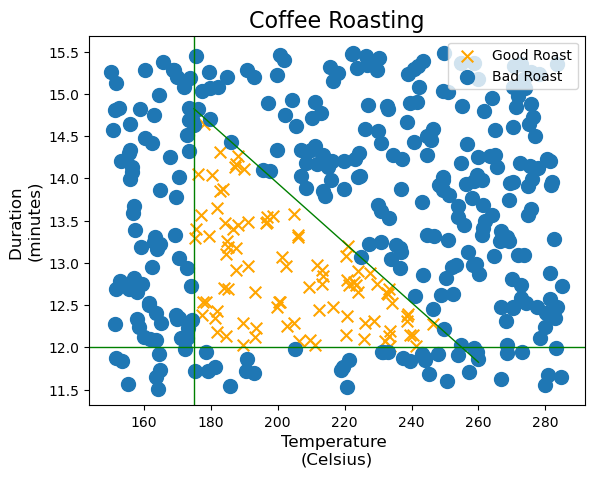

In [142]:
plt_roast(X_cr,Y_cr)

### 3.2.1.4 Normalize Data

#### Apply Z-score normalization:

In [145]:
def scaleX2F(X):
    X1 = (X[:,0] - X[:,0].mean()) / X[:,0].std()
    X2 = (X[:,1] - X[:,1].mean()) / X[:,1].std()
    Xn = np.stack((X1, X2), axis=1)
    return Xn
    
X_cr_n = scaleX2F(X_cr)

In [146]:
print(f"Temperature Max, Min pre normalization: {np.max(X_cr[:,0]):0.2f}, {np.min(X_cr[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X_cr[:,1]):0.2f}, {np.min(X_cr[:,1]):0.2f}")
print(60*"-")
print(f"Temperature Max, Min post normalization: {np.max(X_cr_n[:,0]):0.2f}, {np.min(X_cr_n[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(X_cr_n[:,1]):0.2f}, {np.min(X_cr_n[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 150.29
Duration    Max, Min pre normalization: 15.49, 11.51
------------------------------------------------------------
Temperature Max, Min post normalization: 1.69, -1.72
Duration    Max, Min post normalization: 1.78, -1.72


### 3.2.1.5 Train the Neural Network using Numerical Derivatives

In [148]:
J_hist_cr, param_hist_cr = NNLogR.train_gradientDescent(X_cr_n, Y_cr, 4, 10000,numerical=True, logtime=True)

Epoch 0: Cost = 0.6910524516274055
Epoch 1000: Cost = 0.1648270090655683
Epoch 2000: Cost = 0.03986459154494847
Epoch 3000: Cost = 0.026810571995881185
Epoch 4000: Cost = 0.021426542940144882
Epoch 5000: Cost = 0.01819267479205815
Epoch 6000: Cost = 0.015965386106973248
Epoch 7000: Cost = 0.01431743307636403
Epoch 8000: Cost = 0.013040338901128944
Epoch 9000: Cost = 0.01201670380183225
Elapsed time: 15.6 s


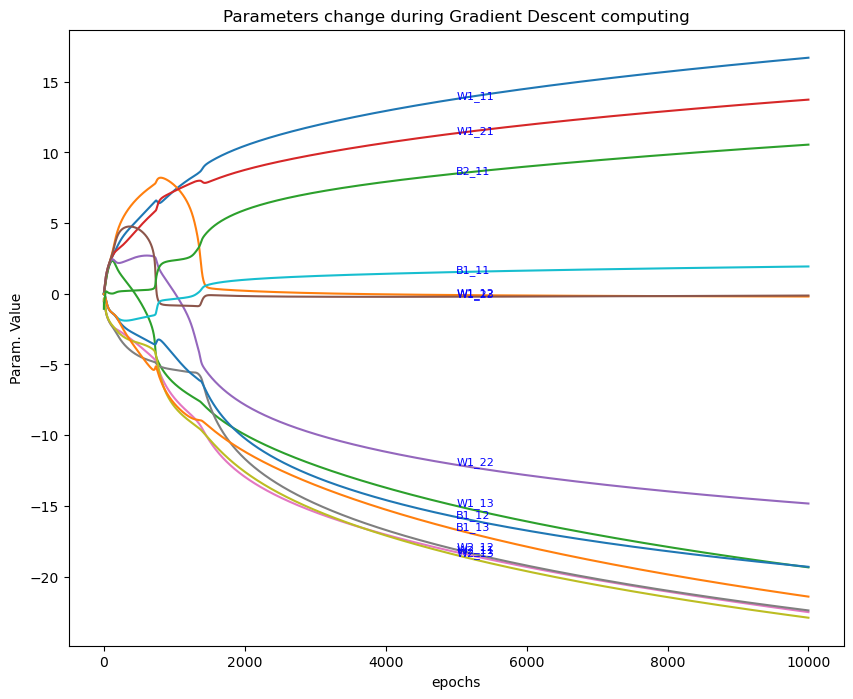

In [149]:
plotParams(param_hist_cr)

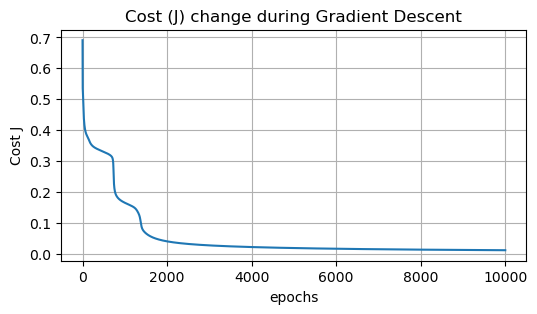

In [150]:
plotJhist(J_hist_cr)

In [265]:
yhat = NNLogR.predict(X_cr_n)

In [337]:
def displayPerf(y,yhat):
    TP = np.sum((y == 1) & (yhat == 1))
    FP = np.sum((y == 0) & (yhat == 1))
    TN = np.sum((y == 0) & (yhat == 0))
    FN = np.sum((y == 1) & (yhat == 0))
    P = np.sum((y == 1))
    N = np.sum((y == 0))
    Pp = np.sum((yhat == 1))
    Np = np.sum((yhat == 0))
    
    
    precision = TP/(TP + FP)
    recall = TP/(TP + FN)
    accuracy = (TP + TN)/(TP + FP + TN + FN)
    print('--- Stats: ---------------------')
    print(f'\tTarget\tPredict')
    print(f'Nb of + {P} \t{Pp} ')
    print(f'Nb of - {N} \t{Np}')
    print('\n')
    print('--- Performance Values: ---------------')
    print(f'Precision: \t{precision*100:.2f} %')
    print(f'Recall: \t{recall*100:.2f} %')
    print(f'Accuracy: \t{accuracy*100:.2f} %')
    

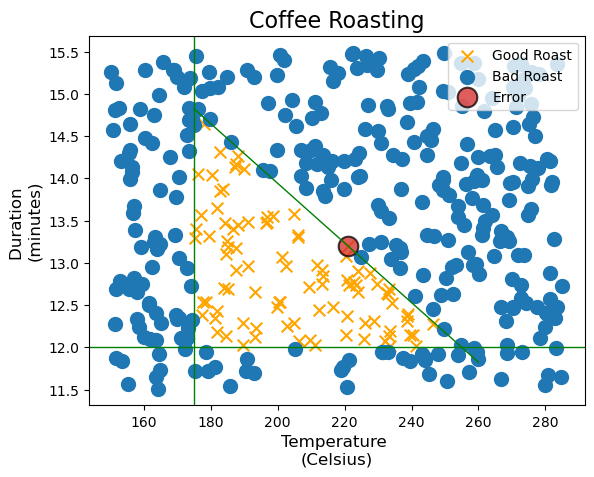

In [307]:
plt_roast(X_cr,Y_cr,yhat)

In [325]:
print(f'Train Accuracy: {(np.mean(yhat ==  Y_cr) * 100):3.2f} %')

Train Accuracy: 99.75 %


In [339]:
displayPerf(Y_cr, yhat)

--- Stats: ---------------------
	Target	Predict
Nb of + 93 	92 
Nb of - 307 	308


--- Performance Values: ---------------
Precision: 	100.00 %
Recall: 	98.92 %
Accuracy: 	99.75 %


In [154]:
errors = (Y_cr.reshape(-1,) != yhat.reshape(-1,))
X_cr[errors,:]


array([[221.05707984,  13.19778711]])

### 3.2.1.6 Train the Neural Network using Analytical Derivatives

In [156]:
NNLogR_AD = Neural_Network_3L_LogR()

In [157]:
J_hist_AD, param_hist_AD = NNLogR_AD.train_gradientDescent(X_cr_n, Y_cr, 6, 10000,numerical=False, logtime=True)

Epoch 0: Cost = 0.6918310971328071
Epoch 1000: Cost = 0.18349573262876517
Epoch 2000: Cost = 0.15460259879439725
Epoch 3000: Cost = 0.029429803158301886
Epoch 4000: Cost = 0.020301212185946757
Epoch 5000: Cost = 0.01626106766404027
Epoch 6000: Cost = 0.013810594580415905
Epoch 7000: Cost = 0.012128714307084216
Epoch 8000: Cost = 0.0108884501528506
Epoch 9000: Cost = 0.009929098686842134
Elapsed time: 2.1 s


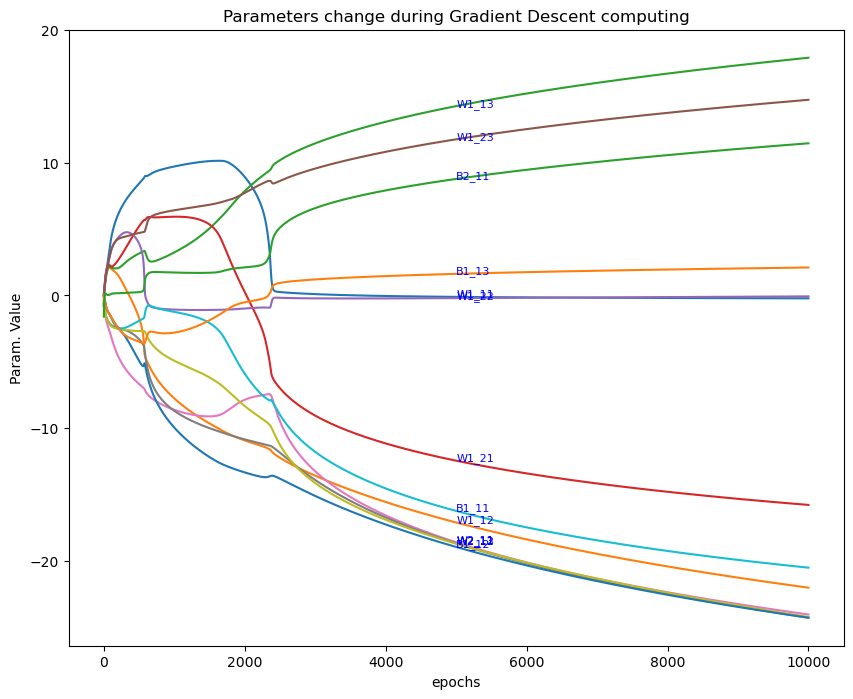

In [158]:
plotParams(param_hist_AD)

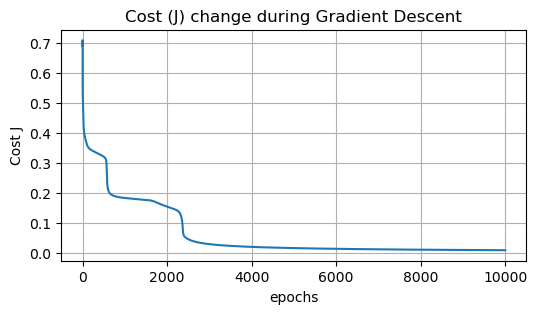

In [159]:
plotJhist(J_hist_AD)

In [160]:
yhat_ad = NNLogR_AD.predict(X_cr_n)

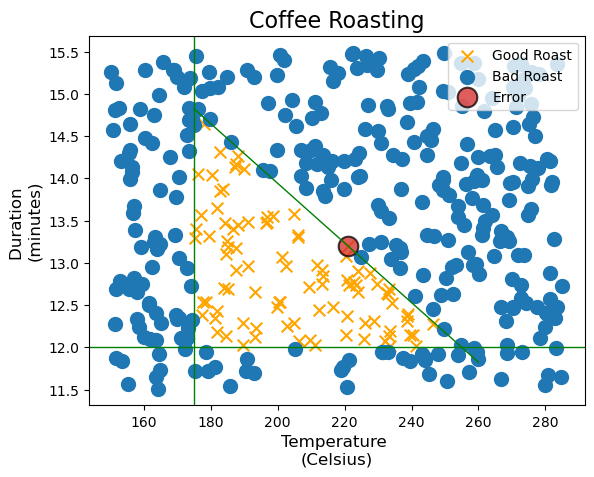

In [161]:
plt_roast(X_cr,Y_cr,yhat_ad)

#### 3.2.1.7 Evaluate with a Test Set

In [163]:
# Load Test Set (randomly generated with a different seed as the Training Set)
X_cr_test, Y_cr_test = load_coffee_data(rows=100,seed=321)
X_cr_test_n = scaleX2F(X_cr_test)

In [164]:
yhat_ad_test = NNLogR_AD.predict(X_cr_test_n)

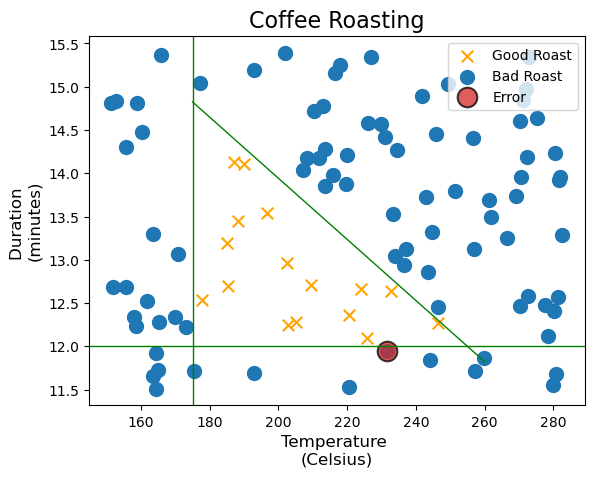

In [165]:
plt_roast(X_cr_test, Y_cr_test, yhat_ad_test)

In [341]:
displayPerf(Y_cr_test, yhat_ad_test)

--- Stats: ---------------------
	Target	Predict
Nb of + 16 	17 
Nb of - 84 	83


--- Performance Values: ---------------
Precision: 	94.12 %
Recall: 	100.00 %
Accuracy: 	99.00 %


In [167]:
errors = (Y_cr_test.reshape(-1,) != yhat_ad_test.reshape(-1,))
X_cr_test[errors,:]

array([[231.51374483,  11.95053142]])

----